In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

In [2]:
df = pd.read_excel('Barnett_fractures.xls')

In [3]:
barnet = df.loc[:, df.columns[:5]]
barnet.head()

,depth (foot),strike (degree),dip (degree),dip_direction (degree),aperture (millimeter)
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44


In [4]:
barnet.columns = ['depth', 'strike', 'dip', 'dip_direction', 'aperture']

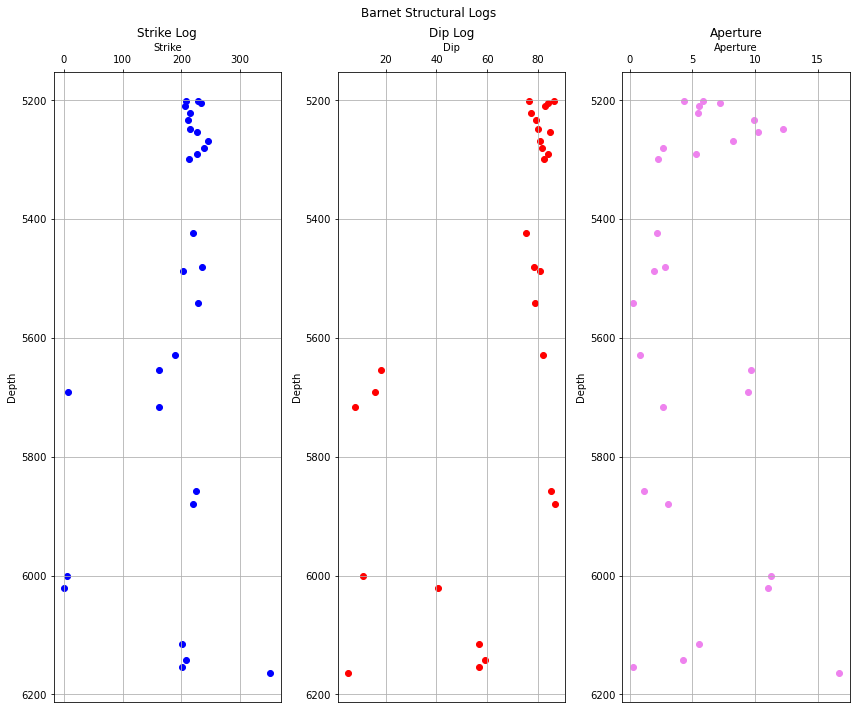

In [5]:
fig, ax = plt.subplots(figsize=[12, 10], ncols=3)
fig.suptitle('Barnet Structural Logs')

ax[0].scatter(barnet['strike'], barnet['depth'], color='blue')
ax[0].invert_yaxis()
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.set_ticks_position('top')
ax[0].set_title('Strike Log')
ax[0].set_xlabel('Strike')
ax[0].set_ylabel('Depth')
ax[0].grid()

ax[1].scatter(barnet['dip'], barnet['depth'], color='red')
ax[1].invert_yaxis()
ax[1].xaxis.set_label_position('top')
ax[1].xaxis.set_ticks_position('top')
ax[1].set_title('Dip Log')
ax[1].set_xlabel('Dip')
ax[1].set_ylabel('Depth')
ax[1].grid()

ax[2].scatter(barnet['aperture'], barnet['depth'], color='violet')
ax[2].invert_yaxis()
ax[2].xaxis.set_label_position('top')
ax[2].xaxis.set_ticks_position('top')
ax[2].set_title('Aperture')
ax[2].set_xlabel('Aperture')
ax[2].set_ylabel('Depth')
ax[2].grid()

plt.tight_layout()

In [6]:
strikes = barnet['strike']
dips = barnet['dip']

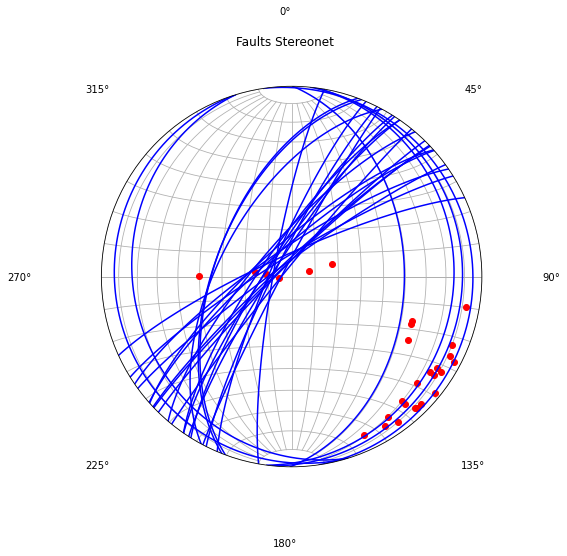

In [7]:
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Faults Stereonet')
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(strikes, dips, c='red')
ax.plane(strikes, dips, c='blue')
ax.grid()

In [8]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

C:\Users\user\AppData\Local\Temp\ipykernel_1480\2523951048.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


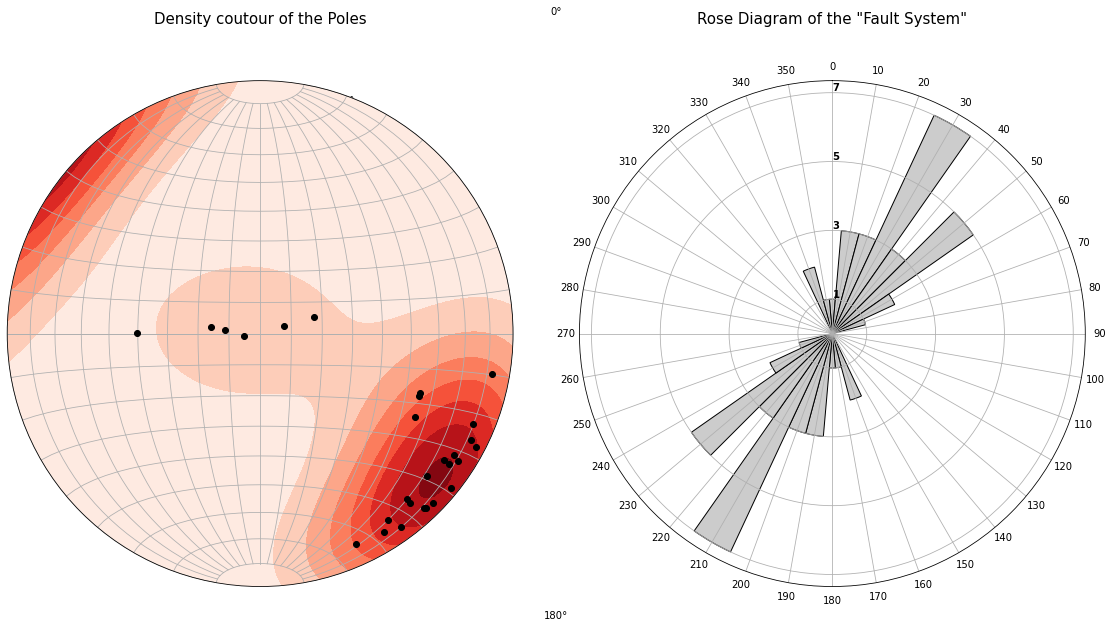

In [9]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

fig.tight_layout()
plt.show()

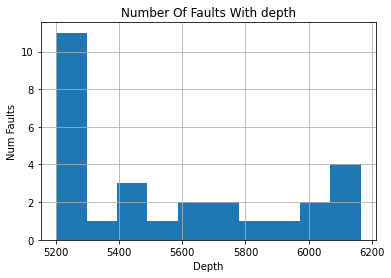

In [10]:
ax = barnet['depth'].hist()
ax.set_title('Number Of Faults With depth')
ax.set_xlabel('Depth')
ax.set_ylabel('Num Faults')
plt.show()

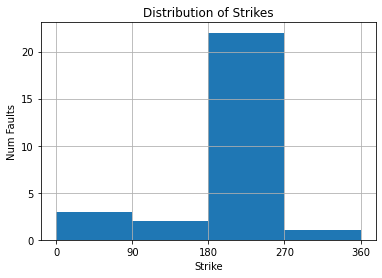

In [11]:
bins = np.arange(0, 360+1, 90)
ax = barnet['strike'].hist(bins=bins)
ax.set_xticks(ticks=bins)
ax.set_title('Distribution of Strikes')
ax.set_xlabel('Strike')
ax.set_ylabel('Num Faults')
plt.show()

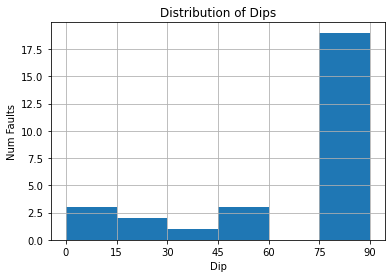

In [12]:
bins = np.arange(0, 90+1, 15)
ax = barnet['dip'].hist(bins=bins)
ax.set_xticks(ticks=bins)
ax.set_title('Distribution of Dips')
ax.set_xlabel('Dip')
ax.set_ylabel('Num Faults')
plt.show()

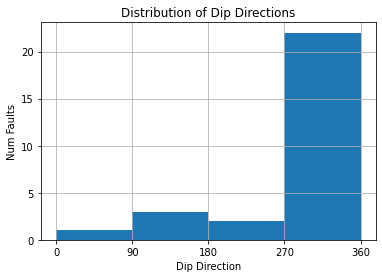

In [13]:
bins = np.arange(0, 360+1, 90)
ax = barnet['dip_direction'].hist(bins=bins)
ax.set_xticks(ticks=bins)
ax.set_title('Distribution of Dip Directions')
ax.set_xlabel('Dip Direction')
ax.set_ylabel('Num Faults')
plt.show()

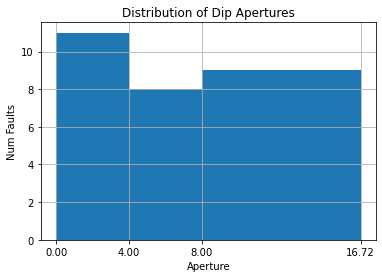

In [14]:
bins = [0, 4, 8, barnet['aperture'].max()]
ax = barnet['aperture'].hist(bins=bins)
ax.set_xticks(ticks=bins)
ax.set_title('Distribution of Dip Apertures')
ax.set_xlabel('Aperture')
ax.set_ylabel('Num Faults')
plt.show()

In [15]:
apertures =pd.cut(barnet['aperture'], bins)
dips = pd.cut(barnet['dip'], bins=[0, 45])
barnet.groupby([apertures, dips])['dip'].count()

aperture      dip    
(0.0, 4.0]    (0, 45]    1
(4.0, 8.0]    (0, 45]    0
(8.0, 16.72]  (0, 45]    5
Name: dip, dtype: int64

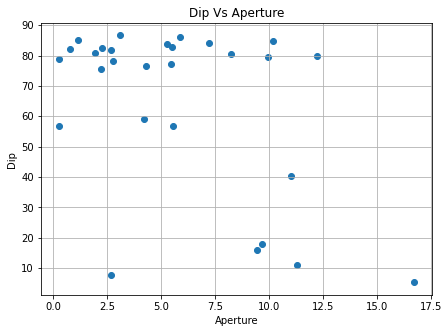

In [16]:
fig, ax = plt.subplots(figsize=[7, 5])
ax.scatter(barnet['aperture'], barnet['dip']) 
ax.set_title('Dip Vs Aperture')
ax.set_xlabel('Aperture')
ax.set_ylabel('Dip')
ax.grid()
plt.show()

In [17]:
col = barnet['strike']
mask = ~(((col > 15) & (col < 75)) | ((col > 105) & (col < 345)))
masked = barnet[mask]
masked

,depth,strike,dip,dip_direction,aperture
18,5691.056,7.48,15.89,97.48,9.44
22,6000.143,5.74,11.19,95.74,11.29
23,6020.270,0.37,40.44,90.37,11.04
27,6164.197,351.60,5.34,81.60,16.72


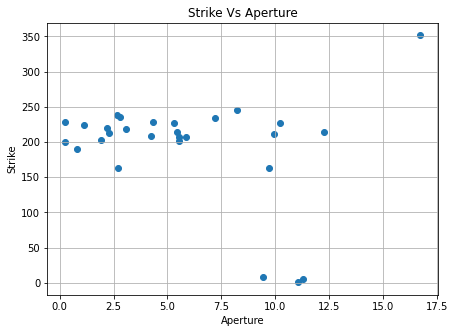

In [18]:
fig, ax = plt.subplots(figsize=[7, 5])
ax.scatter(barnet['aperture'], barnet['strike']) 
ax.set_title('Strike Vs Aperture')
ax.set_xlabel('Aperture')
ax.set_ylabel('Strike')
ax.grid()
plt.show()